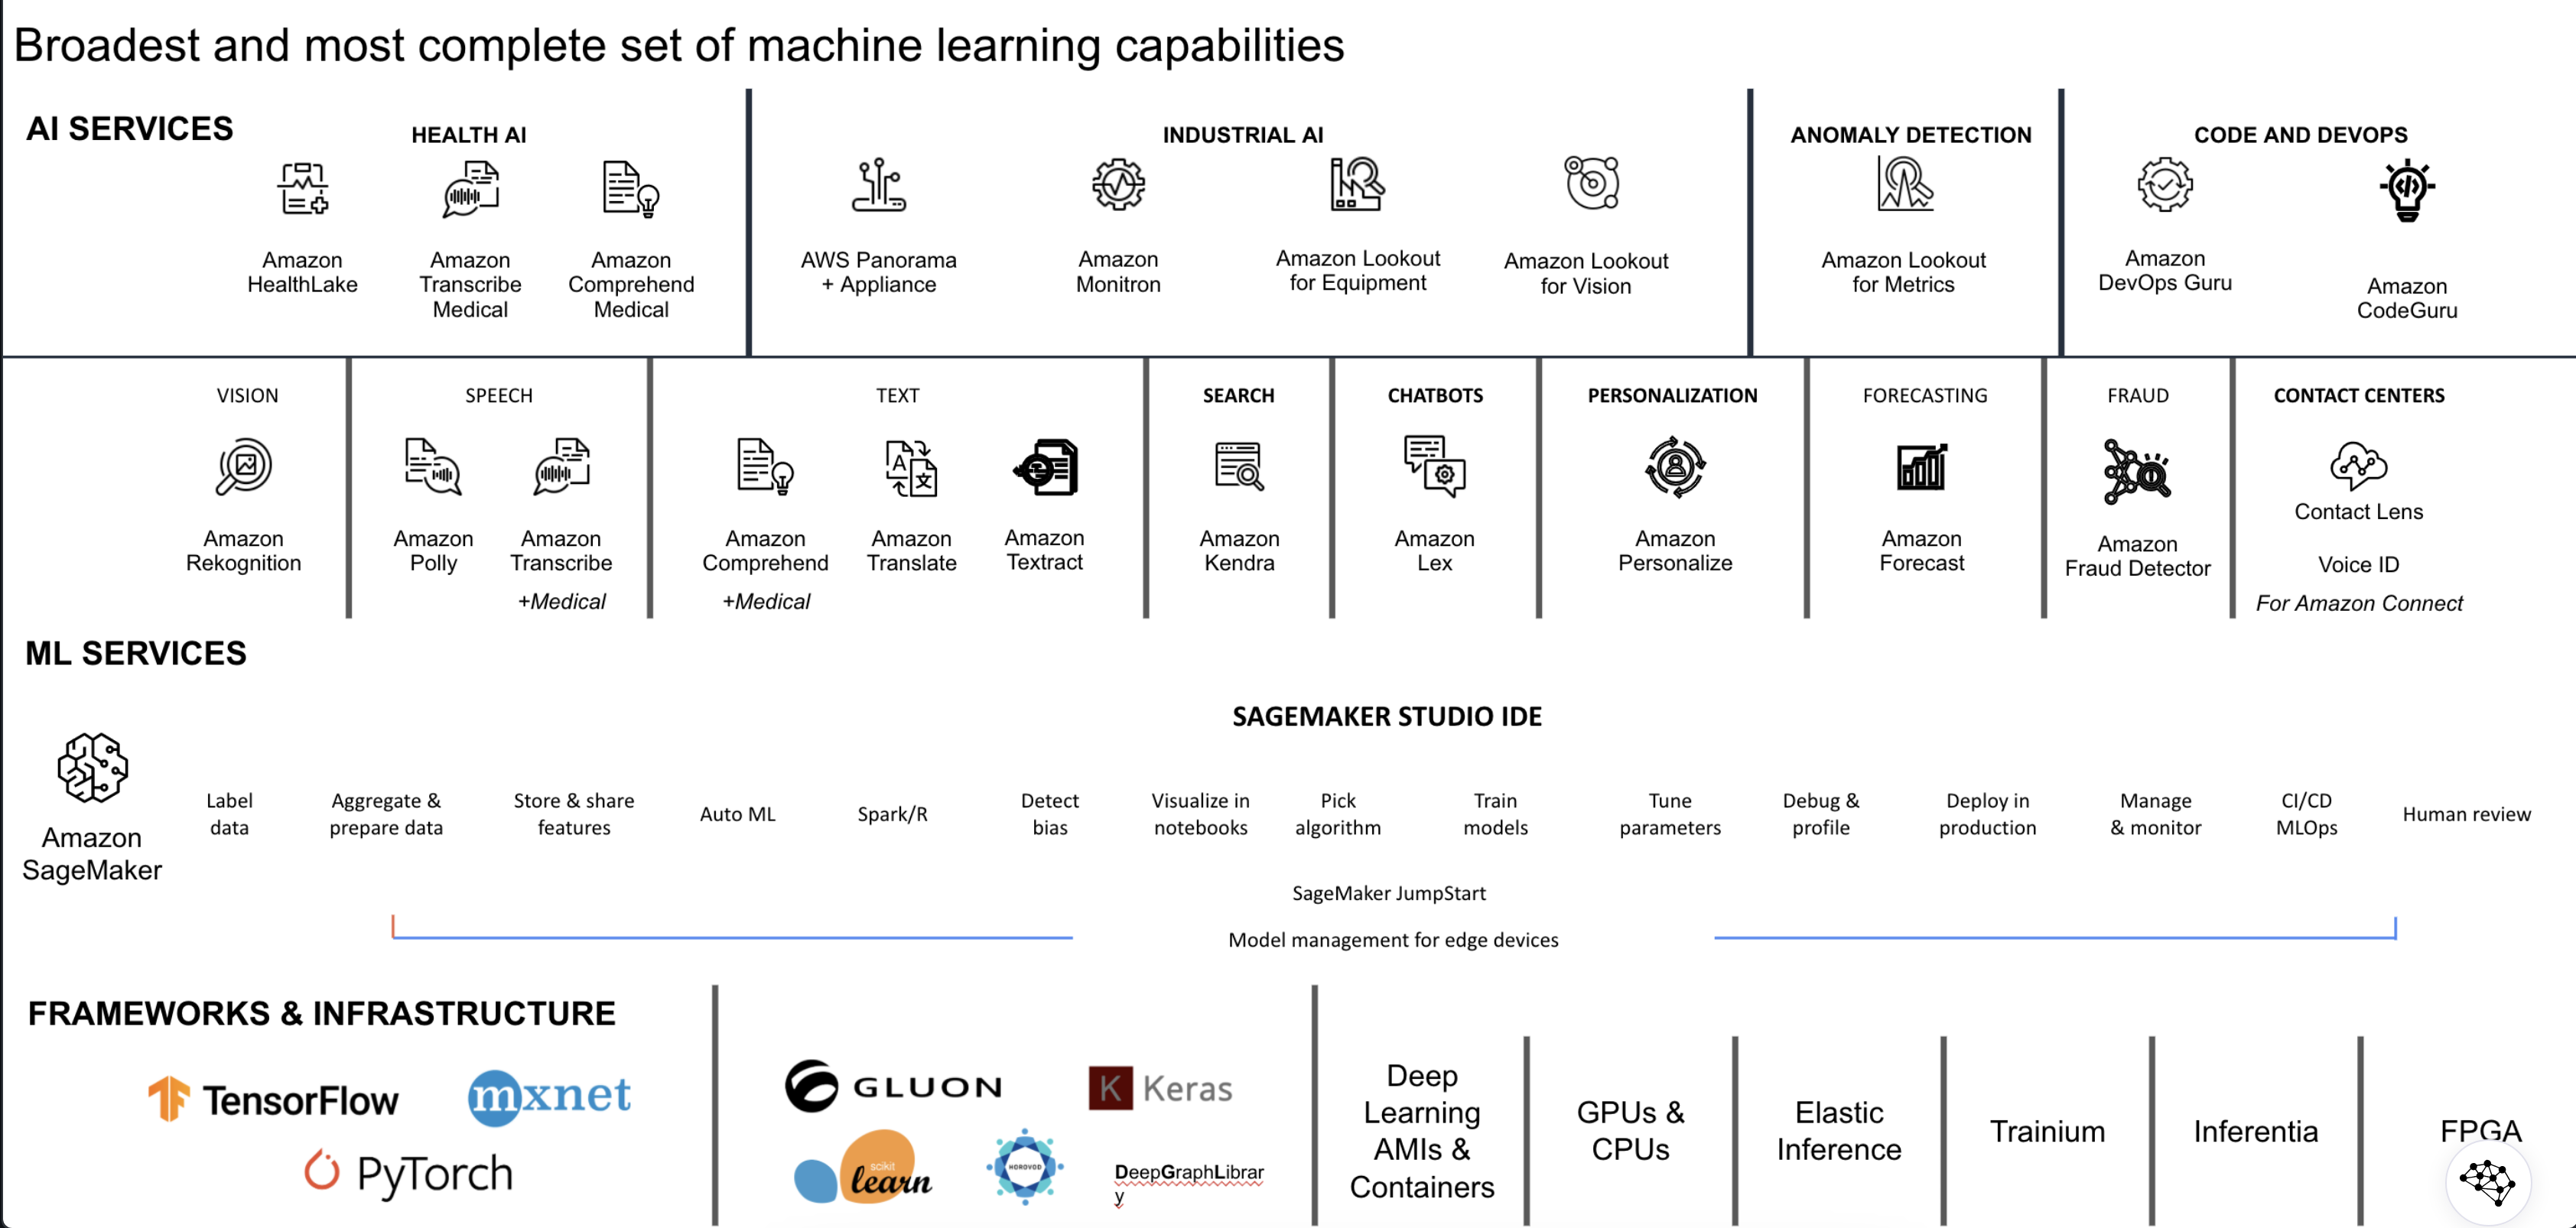

In [135]:
!pip install --disable-pip-version-check -q pip --upgrade > /dev/null
!pip install --disable-pip-version-check -q wrapt --upgrade > /dev/null

In [136]:
!pip install --disable-pip-version-check -q awscli boto3 botocore

# SageMaker

In [137]:
!pip install --disable-pip-version-check -q sagemaker
!pip install --disable-pip-version-check -q smdebug
!pip install --disable-pip-version-check -q sagemaker-experiments

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.27.163 requires PyYAML<5.5,>=3.10, but you have pyyaml 6.0 which is incompatible.


In [138]:
!pip install --disable-pip-version-check -q transformers

In [139]:
!pip install --disable-pip-version-check -q torchserve
!pip install --disable-pip-version-check -q torch-model-archiver

# PyAthena

In [140]:
!pip install --disable-pip-version-check -q PyAthena

In [141]:
!pip install --disable-pip-version-check -q SQLAlchemy
!!pip install --disable-pip-version-check -q psycopg2-binary

[]

# AWS Data Wrangler

In [142]:
!pip install --disable-pip-version-check -q awswrangler

# StepFunctions

In [143]:
!pip install --disable-pip-version-check -q stepfunctions

In [144]:
!conda install -y zip
!pip install --disable-pip-version-check -q matplotlib

/bin/bash: conda: command not found


In [145]:
!pip install awscli

  Using cached PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sagemaker 2.168.0 requires PyYAML==6.0, but you have pyyaml 5.4.1 which is incompatible.


In [146]:
!mkdir ~/.aws

mkdir: cannot create directory ‘/root/.aws’: File exists


In [147]:
!aws --version

aws-cli/1.27.163 Python/3.10.12 Linux/5.15.107+ botocore/1.29.163


In [148]:
!aws configure

AWS Access Key ID [****************KM4G]: 
AWS Secret Access Key [****************JGTD]: 
Default region name [us-east-1]: 
Default output format [None]: 


In [149]:
import boto3
import sagemaker

session = boto3.session.Session()
region = session.region_name
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()

s3 = boto3.Session().client(service_name="s3", region_name=region)

In [150]:
setup_s3_bucket_passed = False

In [151]:
print("Default bucket: {}".format(bucket))

Default bucket: sagemaker-us-east-1-822880695428


# Verify S3_BUCKET Bucket Creation

In [152]:
from botocore.client import ClientError

response = None

try:
    response = s3.head_bucket(Bucket=bucket)
    print(response)
    setup_s3_bucket_passed = True
except ClientError as e:
    print("[ERROR] Cannot find bucket {} in {} due to {}.".format(bucket, response, e))

{'ResponseMetadata': {'RequestId': 'WNW2JEXKS79T11KA', 'HostId': 'Q5vU04NlQVlKdb8xAzvo6KQQNRNkFPK3f9oUvRXcud+rWVnjI4vhlDvm70M23Pvz0hNFsDQg7jdzOJMppP3grg==', 'HTTPStatusCode': 200, 'HTTPHeaders': {'x-amz-id-2': 'Q5vU04NlQVlKdb8xAzvo6KQQNRNkFPK3f9oUvRXcud+rWVnjI4vhlDvm70M23Pvz0hNFsDQg7jdzOJMppP3grg==', 'x-amz-request-id': 'WNW2JEXKS79T11KA', 'date': 'Thu, 29 Jun 2023 15:51:31 GMT', 'x-amz-bucket-region': 'us-east-1', 'x-amz-access-point-alias': 'false', 'content-type': 'application/xml', 'server': 'AmazonS3'}, 'RetryAttempts': 0}}


In [153]:
%store setup_s3_bucket_passed

Stored 'setup_s3_bucket_passed' (bool)


In [154]:
%store

Stored variables and their in-db values:
setup_s3_bucket_passed             -> True


# AWS DATA WRANGLER
AWS Data Wrangler provides optimized Python functions to perform common ETL tasks to load and unload data between data lakes, data warehouses, and databases. After installing AWS Data Wrangler with pip install awswrangler and importing AWS Data Wrangler, we can read our dataset directly from S3 into a pandas DataFrame as shown here:

# Using awswrangler with S3, Glue and Athena

Awswrangler can read and write text, CSV, JSON and PARQUET formatted S3 objects into and out of Pandas dataframes. It can also interact with other AWS services like Glue and Athena.  By way of an example let's create an awswrangler job that will execute the following simple ETL pipeline:

Create a Pandas data frame, populate it with some data and write its contents to a CSV file on S3.  
 Use Glue to crawl the new data file on S3 and create an entry in the Glue Catalog, hence also making the data available under the AWS Athena service.
 Use Athena to perform a Create-Table-As-Select (CTAS) operation to convert the CSV data file into a Parquet data file.  
 Finally, we’ll read the newly created Parquet file back into another Pandas data frame.
For our input data we can use the test file that can be found at http://bit.ly/autompg-csv. This is just a bunch of data (390 records) specifying the properties of some common motor vehicles e.g mpg, fuel type etc...

So, for stage 1 of our ETL we read the CSV data in and display a sample of it.

In [155]:
import awswrangler as wr


# Retrieve the data directly from Amazon S3
df = wr.s3.read_csv(path='s3://aws-ml-anku81/instructors/womens_clothing_ecommerce_reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# 1.3. Transform the data
To simplify the task, you will transform the data into a comma-separated value (CSV) file that contains only a review_body, product_category, and sentiment derived from the original data.

In [156]:
df_transformed = df.rename(columns={'Review Text': 'review_body',
                                    'Rating': 'star_rating',
                                    'Class Name': 'product_category'})
df_transformed.drop(columns=['Unnamed: 0','Clothing ID', 'Age', 'Title', 'Recommended IND', 'Positive Feedback Count', 'Division Name', 'Department Name'],
                    inplace=True)

df_transformed.dropna(inplace=True)

df_transformed.shape

(22628, 3)

In [157]:
df_transformed

,review_body,star_rating,product_category
0,Absolutely wonderful - silky and sexy and comf...,4,Intimates
1,Love this dress! it's sooo pretty. i happene...,5,Dresses
2,I had such high hopes for this dress and reall...,3,Dresses
3,"I love, love, love this jumpsuit. it's fun, fl...",5,Pants
4,This shirt is very flattering to all due to th...,5,Blouses
...,...,...,...
23481,I was very happy to snag this dress at such a ...,5,Dresses
23482,"It reminds me of maternity clothes. soft, stre...",3,Knits
23483,"This fit well, but the top was very see throug...",3,Dresses
23484,I bought this dress for a wedding i have this ...,3,Dresses


Now convert the star_rating into the sentiment (positive, neutral, negative), which later on will be for the prediction.

In [158]:
def to_sentiment(star_rating):
    if star_rating in {1, 2}: # negative
        return -1
    if star_rating == 3:      # neutral
        return 0
    if star_rating in {4, 5}: # positive
        return 1

# transform star_rating into the sentiment
df_transformed['sentiment'] = df_transformed['star_rating'].apply(lambda star_rating:
    to_sentiment(star_rating=star_rating)
)

# drop the star rating column
df_transformed.drop(columns=['star_rating'],
                    inplace=True)

# remove reviews for product_categories with < 10 reviews
df_transformed = df_transformed.groupby('product_category').filter(lambda reviews : len(reviews) > 10)[['sentiment', 'review_body', 'product_category']]

df_transformed.shape

(22626, 3)

In [159]:
# preview the results
df_transformed

,sentiment,review_body,product_category
0,1,Absolutely wonderful - silky and sexy and comf...,Intimates
1,1,Love this dress! it's sooo pretty. i happene...,Dresses
2,0,I had such high hopes for this dress and reall...,Dresses
3,1,"I love, love, love this jumpsuit. it's fun, fl...",Pants
4,1,This shirt is very flattering to all due to th...,Blouses
...,...,...,...
23481,1,I was very happy to snag this dress at such a ...,Dresses
23482,0,"It reminds me of maternity clothes. soft, stre...",Knits
23483,0,"This fit well, but the top was very see throug...",Dresses
23484,0,I bought this dress for a wedding i have this ...,Dresses


In [160]:
df_transformed.to_csv('/content/womens_clothing_ecommerce_reviews_transformed.csv',
                      index=False)

In [161]:
!head -n 5 /content/womens_clothing_ecommerce_reviews_transformed.csv


sentiment,review_body,product_category
1,Absolutely wonderful - silky and sexy and comfortable,Intimates
1,"Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8"".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.",Dresses
0,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",Dresses
1,"I love, love, love this jumpsuit. it's fun, flirty, and fabulo

# Register the public dataset for querying and visualizing
You will register the public dataset into an S3-backed database table so you can query and visualize our dataset at scale.


2.1. Register S3 dataset files as a table for querying
Let's import required modules.

boto3 is the AWS SDK for Python to create, configure, and manage AWS services, such as Amazon Elastic Compute Cloud (Amazon EC2) and Amazon Simple Storage Service (Amazon S3). The SDK provides an object-oriented API as well as low-level access to AWS services.

sagemaker is the SageMaker Python SDK which provides several high-level abstractions for working with the Amazon SageMaker.

In [162]:
import boto3
import sagemaker
import pandas as pd
import numpy as np
import botocore

config = botocore.config.Config(user_agent_extra='dlai-pds/c1/w1')

# low-level service client of the boto3 session
sm = boto3.client(service_name='sagemaker', config=config)

sess = sagemaker.Session(sagemaker_client=sm)

bucket = sess.default_bucket()
role = "arn:aws:iam::822880695428:role/sagemakerrole"
region = sess.boto_region_name
account_id = sess.account_id

print('S3 Bucket: {}'.format(bucket))
print('Region: {}'.format(region))
print('Account ID: {}'.format(account_id))


S3 Bucket: sagemaker-us-east-1-822880695428
Region: us-east-1
Account ID: <bound method Session.account_id of <sagemaker.session.Session object at 0x7f024e9ffc10>>


# Instructions:

open the link
click on the S3 bucket name sagemaker-us-east-1-ACCOUNT
check that it is empty at this stage

In [163]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/home?region={}#">Amazon S3 buckets</a></b>'.format(region)))

Copy the file into the S3 bucket.

In [164]:
!aws s3 cp /content/womens_clothing_ecommerce_reviews_transformed.csv s3://$bucket/data/transformed/womens_clothing_ecommerce_reviews_transformed.csv

upload: ./womens_clothing_ecommerce_reviews_transformed.csv to s3://sagemaker-us-east-1-822880695428/data/transformed/womens_clothing_ecommerce_reviews_transformed.csv


# Review the bucket with the file we uploaded above.

Instructions:

open the link
check that the CSV file is located in the S3 bucket
check the location directory structure is the same as in the CLI command above
click on the file name and see the available information about the file (region, size, S3 URI, Amazon Resource Name (ARN))

In [165]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/buckets/{}?region={}&prefix=data/transformed/#">Amazon S3 buckets</a></b>'.format(bucket, region)))

Stage 2 of our pipeline is to crawl the newly created file using Glue so that it gets cataloged. Before that there's a couple of things we need to do first though.

Firstly, ensure that our target Glue database exists and if not, create it. We can get a list of the currently existing Glue database like so:

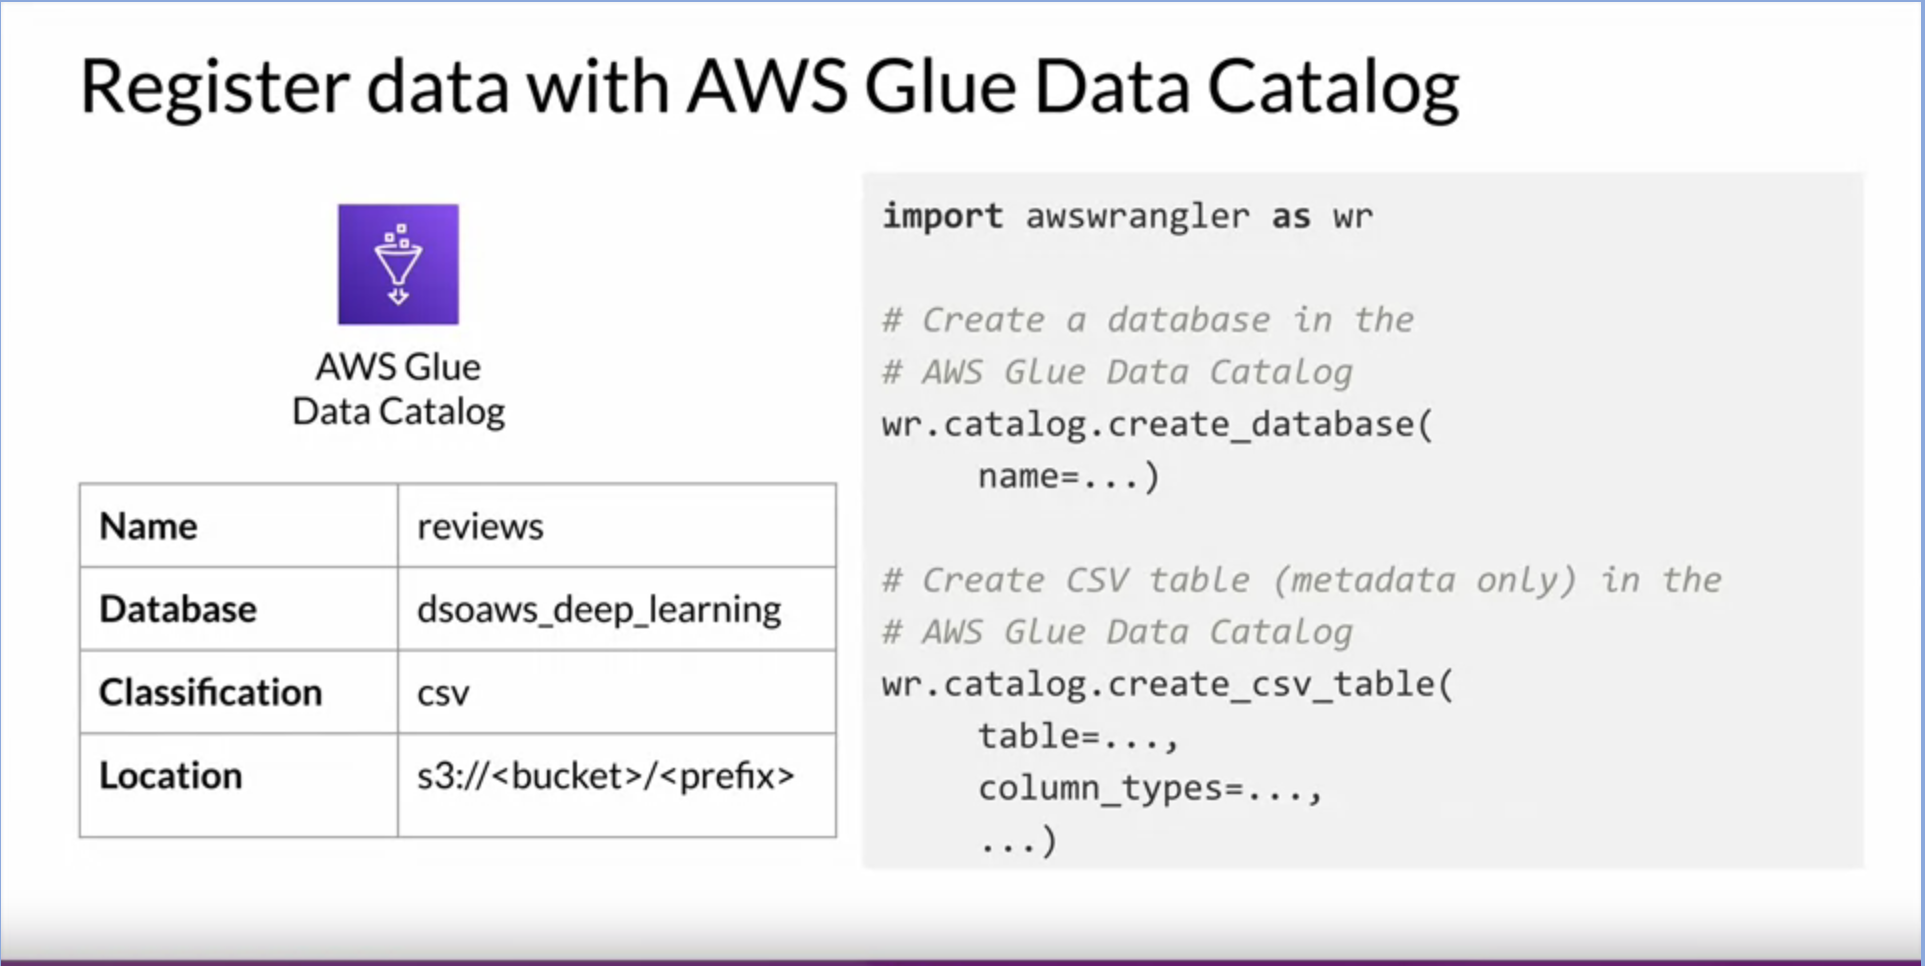

#Please check : https://buildmedia.readthedocs.org/media/pdf/aws-data-wrangler/latest/aws-data-wrangler.pdf

# Create AWS Glue Catalog database

The data catalog features of AWS Glue and the inbuilt integration to Amazon S3 simplify the process of identifying data and deriving the schema definition out of the discovered data. Using AWS Glue crawlers within your data catalog, you can traverse your data stored in Amazon S3 and build out the metadata tables that are defined in your data catalog.

Here you will use wr.catalog.create_database function to create a database with the name dsoaws_deep_learning ("dsoaws" stands for "Data Science on AWS").

In [166]:
wr.catalog.create_database(
    name='dsoaws_deep_learning',
    exist_ok=True
)

In [167]:
dbs = wr.catalog.get_databases()

for db in dbs:
    print("Database name: " + db['Name'])

Database name: dsoaws_deep_learning
Database name: machine_learning 


# Review the created database in the AWS Glue Catalog.

Instructions:

open the link
on the left side panel notice that you are in the AWS Glue -> Data Catalog -> Databases
- check that the database dsoaws_deep_learning has been created
- click on the name of the database
- click on the Tables in dsoaws_deep_learning link to see that there are no tables


In [168]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://console.aws.amazon.com/glue/home?region={}#catalog:tab=databases">AWS Glue Databases</a></b>'.format(region)))

# Exercise 2
Register CSV data with AWS Glue Catalog.

**Instructions**:
Use ```wr.catalog.create_csv_table``` function with the following parameters
```python
res = wr.catalog.create_csv_table(
    database='...', # AWS Glue Catalog database name
    path='s3://{}/data/transformed/'.format(bucket), # S3 object path for the data
    table='reviews', # registered table name
    columns_types={
        'sentiment': 'int',        
        'review_body': 'string',
        'product_category': 'string'      
    },
    mode='overwrite',
    skip_header_line_count=1,
    sep=','    
)
```



In [197]:
's3://{}/data/transformed/'.format(bucket)

's3://sagemaker-us-east-1-822880695428/data/transformed/'

In [228]:
wr.catalog.create_csv_table(
    database='dsoaws_deep_learning', # Replace None
    path='s3://{}/data/transformed/'.format(bucket),
    table="reviews",
    columns_types={
        'sentiment': 'int',
        'review_body': 'string',
        'product_category': 'string'
    },
    mode='overwrite',
    skip_header_line_count=1,
    sep=','
)

##Review the registered table in the AWS Glue Catalog.

Instructions:

open the link
on the left side panel notice that you are in the AWS Glue -> Data Catalog -> Databases -> Tables
- check that you can see the table reviews from the database
- dsoaws_deep_learning in the list
- click on the name of the table
- explore the available information about the table (name, database, classification, location, schema etc.)


In [229]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://console.aws.amazon.com/glue/home?region={}#">AWS Glue Catalog</a></b>'.format(region)))

In [230]:
table = wr.catalog.table(database='dsoaws_deep_learning',
                         table='reviews')
table

,Column Name,Type,Partition,Comment
0,sentiment,int,False,
1,review_body,string,False,
2,product_category,string,False,


# 2.2. Create default S3 bucket for Amazon Athena
Amazon Athena requires this S3 bucket to store temporary query results and improve performance of subsequent queries.

The contents of this bucket are mostly binary and human-unreadable.

In [231]:
# S3 bucket name
wr.athena.create_athena_bucket()

# EXPECTED OUTPUT
# 's3://aws-athena-query-results-ACCOUNT-REGION/'

's3://aws-athena-query-results-822880695428-us-east-1/'

# 3. Visualize data
Reviews dataset - column descriptions

- sentiment: The review's sentiment (-1, 0, 1).
- product_category: Broad product category that can be used to group reviews (in this case digital videos).
- review_body: The text of the review.



## 3.1. Preparation for data visualization
Imports

In [232]:
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

###Settings

Set AWS Glue database and table name.

In [233]:
# Do not change the database and table names - they are used for grading purposes!
database_name = 'dsoaws_deep_learning'
table_name = 'reviews'

Set seaborn parameters. You can review seaborn documentation following the [link](https://seaborn.pydata.org/index.html).

In [234]:
sns.set_style = 'seaborn-whitegrid'

sns.set(rc={"font.style":"normal",
            "axes.facecolor":"white",
            'grid.color': '.8',
            'grid.linestyle': '-',
            "figure.facecolor":"white",
            "figure.titlesize":20,
            "text.color":"black",
            "xtick.color":"black",
            "ytick.color":"black",
            "axes.labelcolor":"black",
            "axes.grid":True,
            'axes.labelsize':10,
            'xtick.labelsize':10,
            'font.size':10,
            'ytick.labelsize':10})

Helper code to display values on barplots:

**Run SQL queries using Amazon Athena**

**Amazon Athena** lets you query data in Amazon S3 using a standard SQL interface. It reflects the databases and tables in the AWS Glue Catalog. You can create interactive queries and perform any data manipulations required for further downstream processing.

Standard SQL query can be saved as a string and then passed as a parameter into the Athena query. Run the following cells as an example to count the total number of reviews by sentiment. The SQL query here will take the following form:

```sql
SELECT column_name, COUNT(column_name) as new_column_name
FROM table_name
GROUP BY column_name
ORDER BY column_name
```

If you are not familiar with the SQL query statements, you can review some tutorials following the [link](https://www.w3schools.com/sql/default.asp).

<a name='c1w1-3.2.'></a>
### 3.2. How many reviews per sentiment?

Set the SQL statement to find the count of sentiments:

In [235]:
statement_count_by_sentiment = """
SELECT sentiment, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY sentiment
ORDER BY sentiment
"""

print(statement_count_by_sentiment)


SELECT sentiment, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY sentiment
ORDER BY sentiment



In [236]:
df_count_by_sentiment = wr.athena.read_sql_query(
    sql=statement_count_by_sentiment,
    database=database_name
)

print(df_count_by_sentiment)

   sentiment  count_sentiment
0         -1             2370
1          0             2865
2          1            17433
3          5                1
4       <NA>                0


<Axes: xlabel='sentiment'>

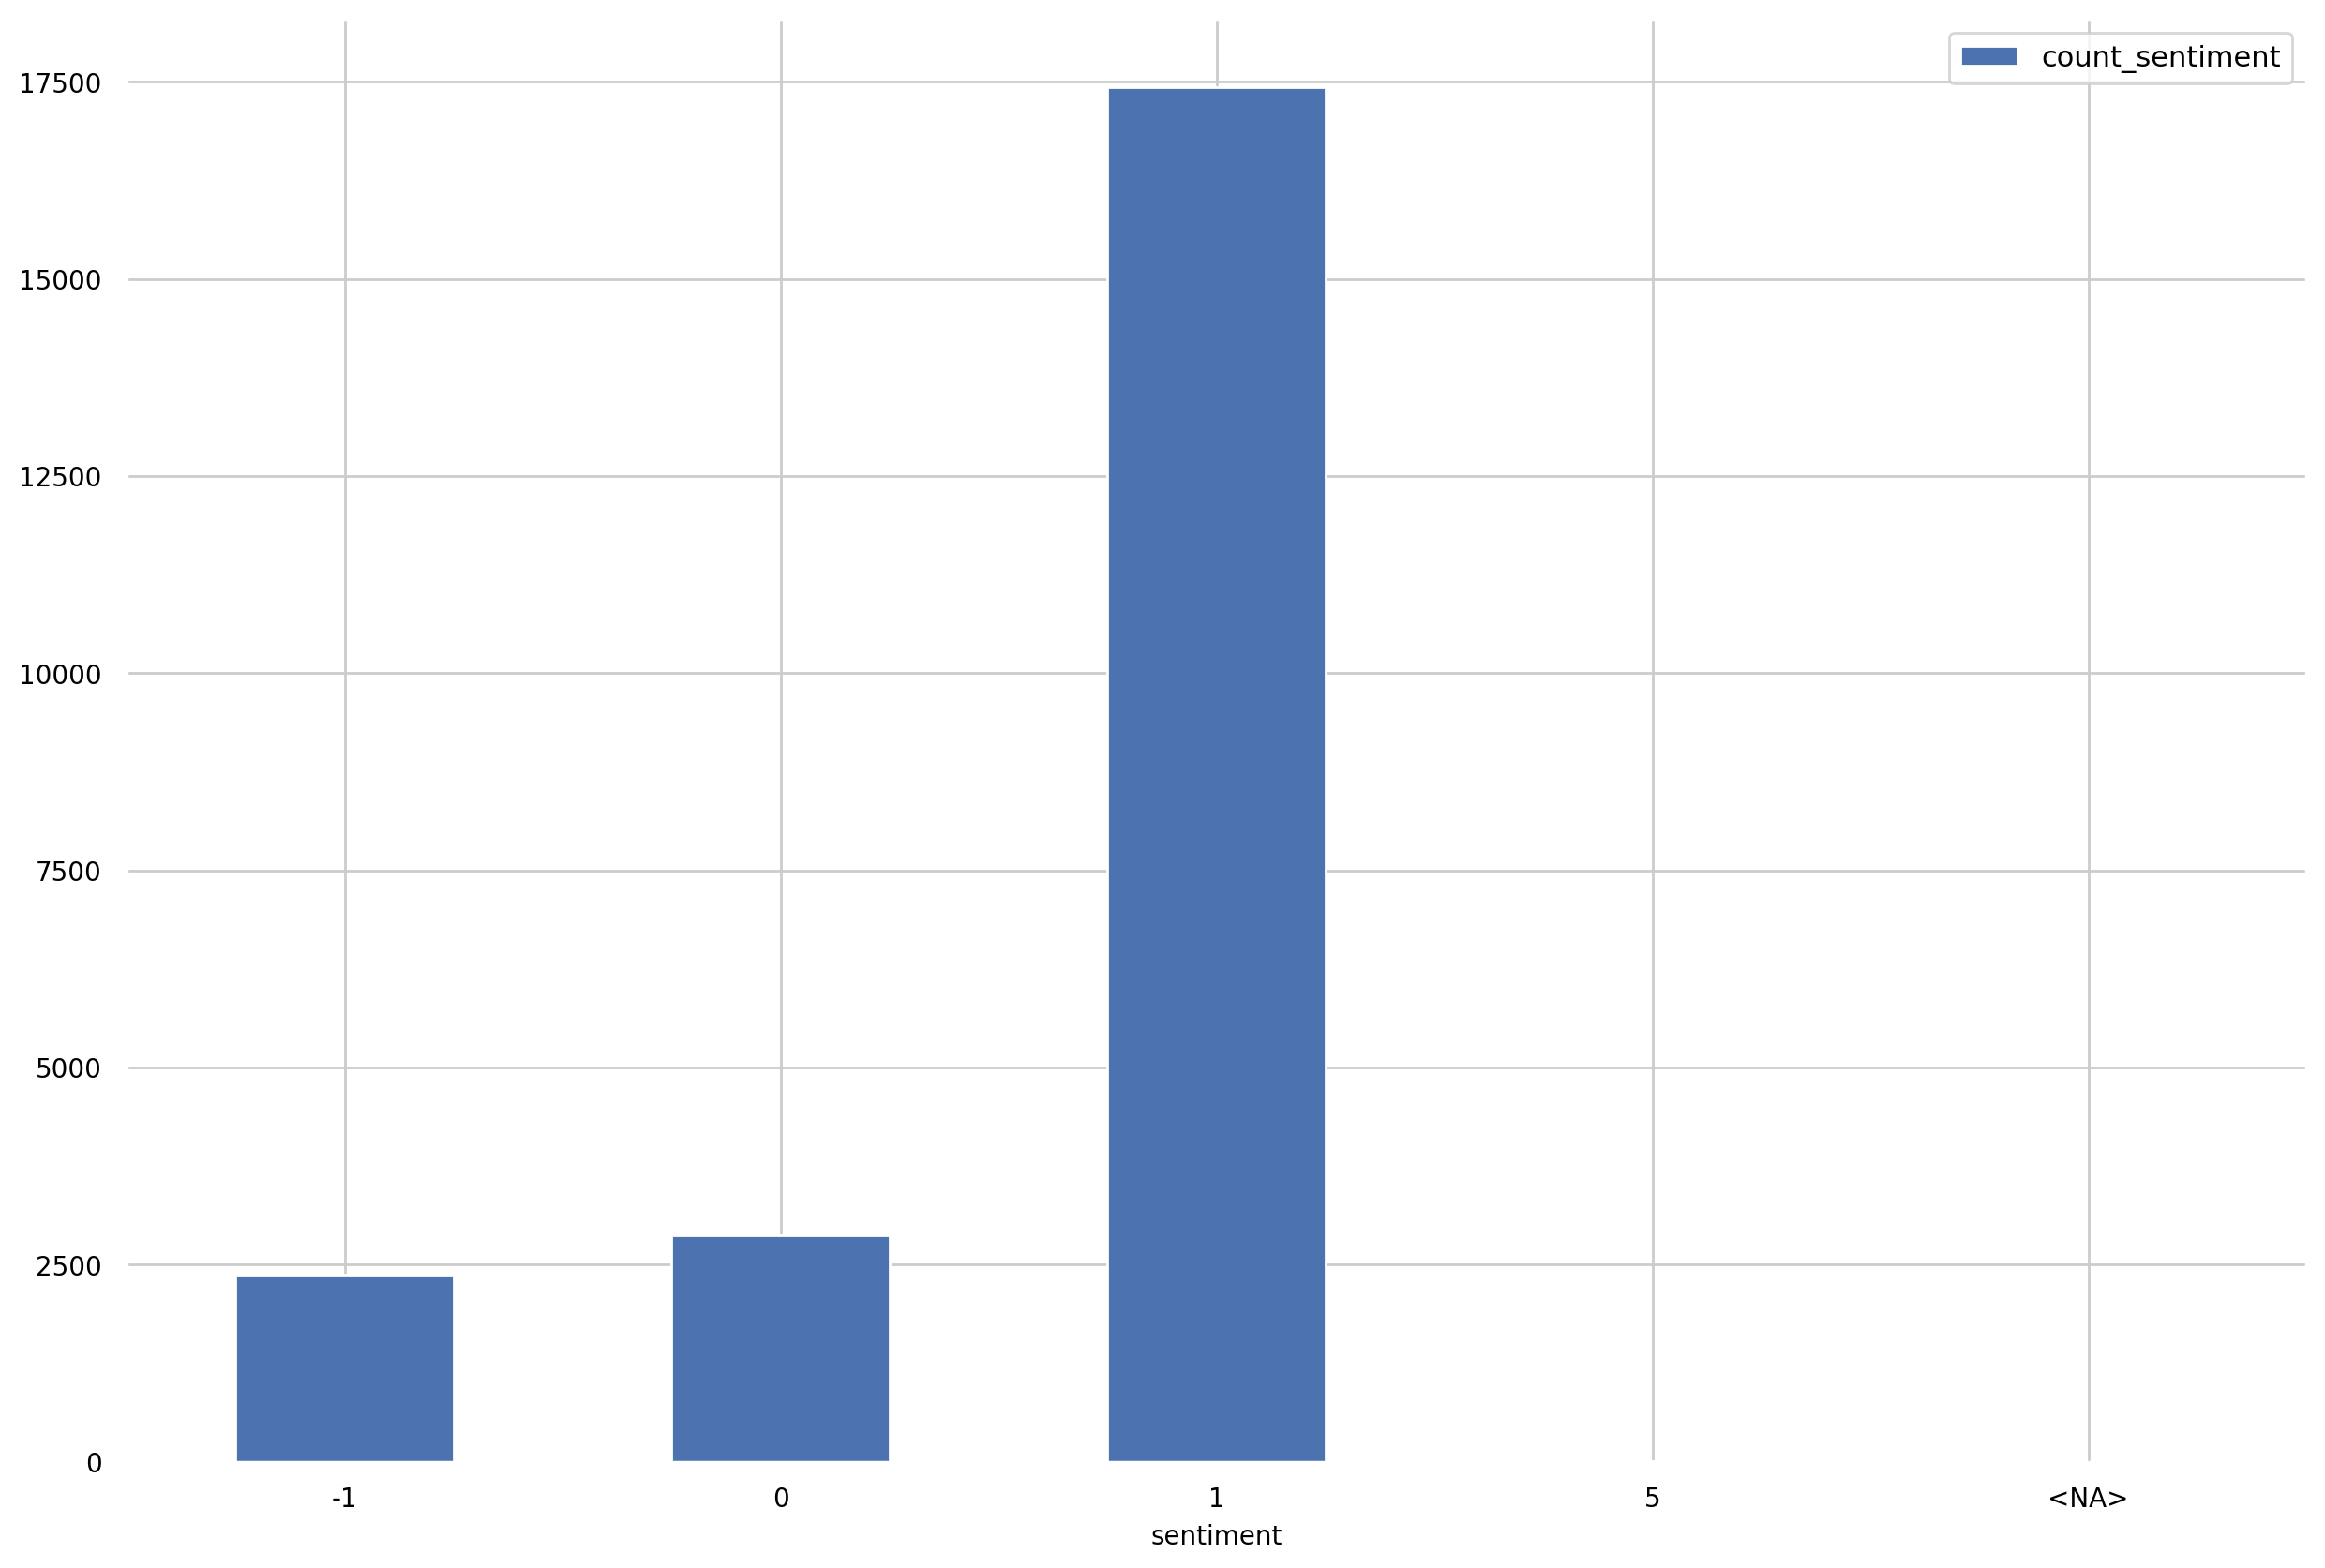

In [207]:
df_count_by_sentiment.plot(kind='bar', x='sentiment', y='count_sentiment', rot=0)

<a name='c1w1-ex-3'></a>
### Exercise 3

Use Amazon Athena query with the standard SQL statement passed as a parameter, to calculate the total number of reviews per `product_category` in the table ```reviews```.

**Instructions**: Pass the SQL statement of the form

```sql
SELECT category_column, COUNT(column_name) AS new_column_name
FROM table_name
GROUP BY category_column
ORDER BY new_column_name DESC
```

as a triple quote string into the variable `statement_count_by_category`. Please use the column `sentiment` in the `COUNT` function and give it a new name `count_sentiment`.

In [237]:
statement_count_by_category = """
SELECT product_category, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY product_category
ORDER BY count_sentiment DESC
"""
### END SOLUTION - DO NOT delete this comment for grading purposes
print(statement_count_by_category)


SELECT product_category, COUNT(sentiment) AS count_sentiment
FROM reviews
GROUP BY product_category 
ORDER BY count_sentiment DESC



Query data in Amazon Athena database passing the prepared SQL statement:

In [238]:
%%time
df_count_by_category = wr.athena.read_sql_query(
    sql=statement_count_by_category,
    database=database_name
)

df_count_by_category

CPU times: user 327 ms, sys: 22.3 ms, total: 349 ms
Wall time: 3.79 s


,product_category,count_sentiment
0,Dresses,1428
1,Knits,1338
2,Blouses,789
3,<NA>,714
4,Sweaters,383
...,...,...
15953,i'm a xs or s petite. i wear a 0 or a 2. this...,0
15954,has no stretch at all. i wasn't expecting str...,0
15955,"especially at the wonderful sale price!""",0
15956,as long as it goes with your skin tone,0


<a name='c1w1-3.3.'></a>
### 3.3. Which product categories are highest rated by average sentiment?

Set the SQL statement to find the average sentiment per product category, showing the results in the descending order:

In [239]:
statement_avg_by_category = """
SELECT product_category, AVG(sentiment) AS avg_sentiment
FROM {}
GROUP BY product_category
ORDER BY avg_sentiment DESC
""".format(table_name)

print(statement_avg_by_category)


SELECT product_category, AVG(sentiment) AS avg_sentiment
FROM reviews 
GROUP BY product_category 
ORDER BY avg_sentiment DESC



Query data in Amazon Athena database passing the prepared SQL statement:

In [240]:
%%time
df_avg_by_category = wr.athena.read_sql_query(
    sql=statement_avg_by_category,
    database=database_name
)

CPU times: user 426 ms, sys: 23.4 ms, total: 449 ms
Wall time: 3.8 s


Preview the query results in the temporary S3 bucket:  `s3://aws-athena-query-results-ACCOUNT-REGION/`

**Instructions**:
- open the link
- check the name of the S3 bucket
- briefly check the content of it

In [241]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/buckets/aws-athena-query-results-{}-{}?region={}">Amazon S3 buckets</a></b>'.format(account_id, region, region)))

In [242]:
df_avg_by_category

,product_category,avg_sentiment
0,but size 10's (and 30's in pilcro hyphens) us...,1.0
1,and these are probably my favorites of all my...,1.0
2,timeless,1.0
3,i am 5'0 and 120 lb and both the small and me...,1.0
4,this is it. i find it tts. if you're in betwe...,1.0
...,...,...
15953,soft fabric. love the snails on the pockets ...,1.0
15954,so decided to try this one and ordered it. i ...,1.0
15955,so i returned it. it would be cute with a cam...,1.0
15956,and i would have initially,1.0


# Visualization

In [243]:
def show_values_barplot(axs, space):
    def _show_on_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = round(float(p.get_width()),2)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_plot(ax)
    else:
        _show_on_plot(axs)


In [244]:
# Create plot
barplot = sns.barplot(
    data = df_avg_by_category,
    y='product_category',
    x='avg_sentiment',
    color="b",
    saturation=1
)

# Set the size of the figure
sns.set(rc={'figure.figsize':(15.0, 10.0)})

# Set title and x-axis ticks
plt.title('Average sentiment by product category')
#plt.xticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])

# Helper code to show actual values afters bars
show_values_barplot(barplot, 0.1)

plt.xlabel("Average sentiment")
plt.ylabel("Product category")

plt.tight_layout()
# Do not change the figure name - it is used for grading purposes!
plt.savefig('avg_sentiment_per_category.png', dpi=300)

# Show graphic
plt.show(barplot)


ValueError: ignored

Error in callback <function _draw_all_if_interactive at 0x7f02dbde20e0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 1500x1000 with 1 Axes>

In [ ]:
# Upload image to S3 bucket
sess.upload_data(path='avg_sentiment_per_category.png', bucket=bucket, key_prefix="images")

Review the bucket on the account.

**Instructions**:
- open the link
- click on the S3 bucket name `sagemaker-us-east-1-ACCOUNT`
- open the images folder
- check the existence of the image `avg_sentiment_per_category.png`
- if you click on the image name, you can see the information about the image file. You can also download the file with the command on the top right Object Actions -> Download / Download as
<img src="images/download_image_file.png" width="100%">

In [ ]:
from IPython.core.display import display, HTML

display(HTML('<b>Review <a target="top" href="https://s3.console.aws.amazon.com/s3/home?region={}">Amazon S3 buckets</a></b>'.format(region)))

<a name='c1w1-3.4.'></a>
### 3.4. Which product categories have the most reviews?

Set the SQL statement to find the count of sentiment per product category, showing the results in the descending order:

In [ ]:
statement_count_by_category_desc = """
SELECT product_category, COUNT(*) AS count_reviews
FROM {}
GROUP BY product_category
ORDER BY count_reviews DESC
""".format(table_name)

print(statement_count_by_category_desc)

In [ ]:
%%time
df_count_by_category_desc = wr.athena.read_sql_query(
    sql=statement_count_by_category_desc,
    database=database_name
)

max_sentiment = df_count_by_category_desc['count_reviews'].max()
print('Highest number of reviews (in a single category): {}'.format(max_sentiment))

# Exercise 4
Use barplot function to plot number of reviews per product category.

Instructions: Use the barplot chart example in the previous section, passing the newly defined dataframe df_count_by_category_desc with the count of reviews. Here, please put the product_category column into the y argument.

In [ ]:
# Create seaborn barplot
barplot = sns.barplot(
    ### BEGIN SOLUTION - DO NOT delete this comment for grading purposes
    data=df_count_by_category_desc, # Replace None
    y='product_category', # Replace None
    x='count_reviews', # Replace None
    ### END SOLUTION - DO NOT delete this comment for grading purposes
    color="b",
    saturation=1
)

# Set the size of the figure
sns.set(rc={'figure.figsize':(15.0, 10.0)})

# Set title
plt.title("Number of reviews per product category")
plt.xlabel("Number of reviews")
plt.ylabel("Product category")

plt.tight_layout()

# Do not change the figure name - it is used for grading purposes!
plt.savefig('num_reviews_per_category.png', dpi=300)

# Show the barplot
plt.show(barplot)